In [5]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [8]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [22]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
#print("Dataset size:\n ", df.shape)
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


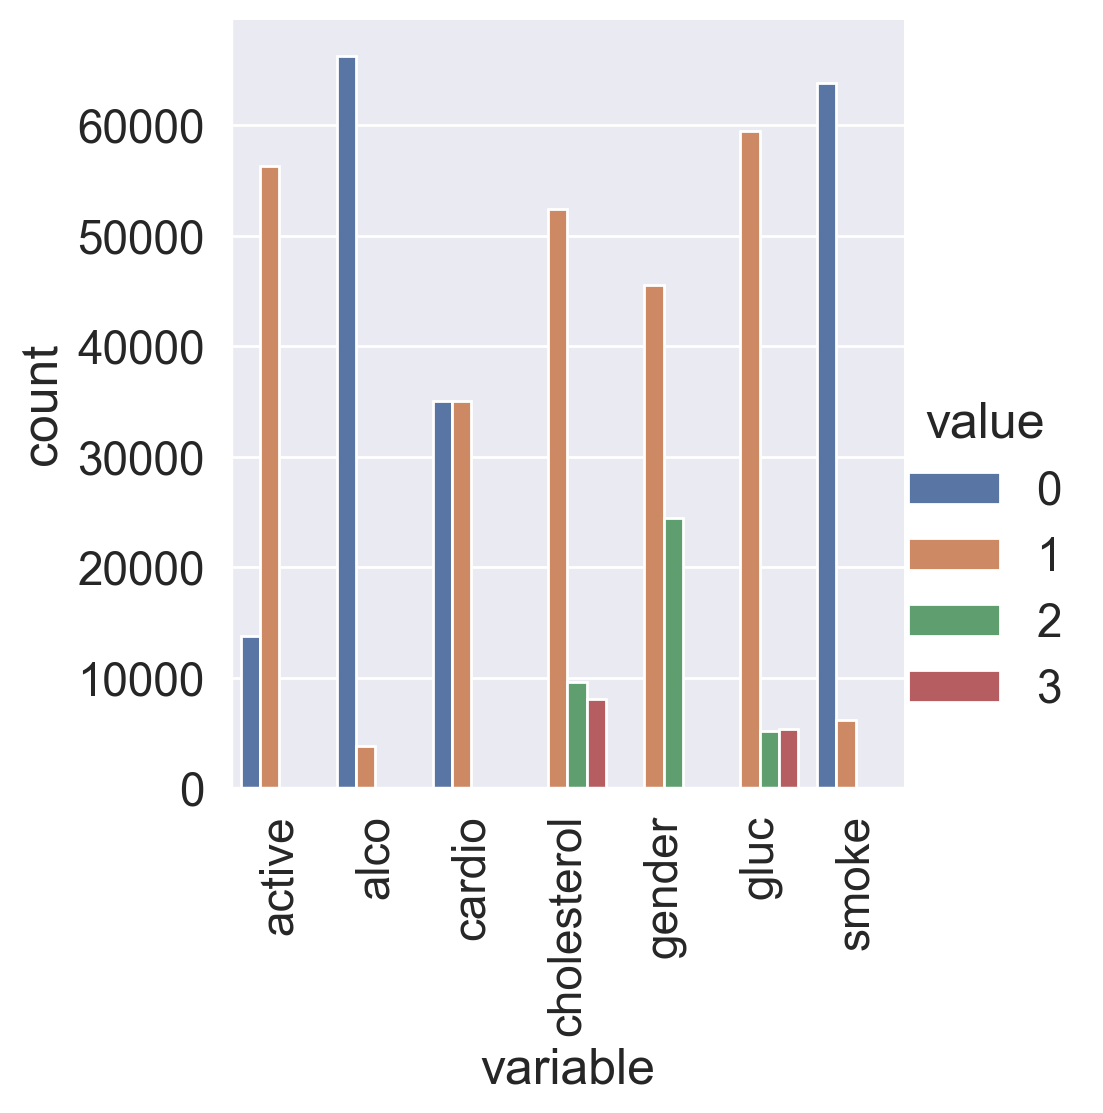

In [11]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

In [16]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")
    

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [13]:
print(df.groupby("gender")["height"].mean())


gender
1    161.355612
2    169.947895
Name: height, dtype: float64


In [15]:
print(df.groupby("gender")["alco"].mean())

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64


In [18]:
print(df.groupby("gender")["smoke"].mean()*100)

gender
1     1.785636
2    21.888026
Name: smoke, dtype: float64


In [25]:
print(df.groupby("smoke")["age"].median())

smoke
0    19722.0
1    19125.0
Name: age, dtype: float64


In [37]:

def bmi():
    df["bmi"]=df["weight"]/(df["height"]/100)**2
    print(df["bmi"].median())
    print(df.groupby("gender")["bmi"].mean())
    print(df.groupby(["gender","cholesterol","cardio","alco"])["bmi"].median())

bmi()


26.374068120774975
gender
1    27.987583
2    26.754442
Name: bmi, dtype: float64
gender  cholesterol  cardio  alco
1       1            0       0       25.402816
                             1       27.358845
                     1       0       27.180900
                             1       28.981143
        2            0       0       26.953125
                             1       28.577961
                     1       0       28.841532
                             1       29.761905
        3            0       0       27.639801
                             1       32.843830
                     1       0       29.744200
                             1       32.323232
2       1            0       0       24.913495
                             1       25.209201
                     1       0       26.297578
                             1       26.722873
        2            0       0       26.218821
                             1       26.412962
                     1       0       2

In [ ]:
df_to